In [47]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

In [35]:
# load the dataset
df = pd.read_csv('titanic.csv')

In [36]:
# drop name, cabin, ticket columns
df = df.drop(labels=['Name', 'Cabin', 'Ticket'], axis=1)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


encoder = OneHotEncoder(sparse_output=False,drop='first')
# df_encoded = pd.DataFrame(encoder.fit_transform(df[['Age', 'Embarked']]),columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
df = pd.get_dummies(df, columns=['Sex', 'Embarked'],drop_first=True)


In [ ]:
X = df.drop(labels=['Survived'], axis=1)
y = df['Survived']

X_train , X_test , y_train , y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

In [39]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train , y_train)

y_pred = decision_tree.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print(f'accuracy score is: {100 * acc_score:.2f}%')

conf_matrix  = confusion_matrix(y_test, y_pred)
for row in conf_matrix:
    print(row)


f1score = f1_score(y_test, y_pred) 
print(f'f1 score is : {f1score:.2f}')

print(precision_score(y_test, y_pred))

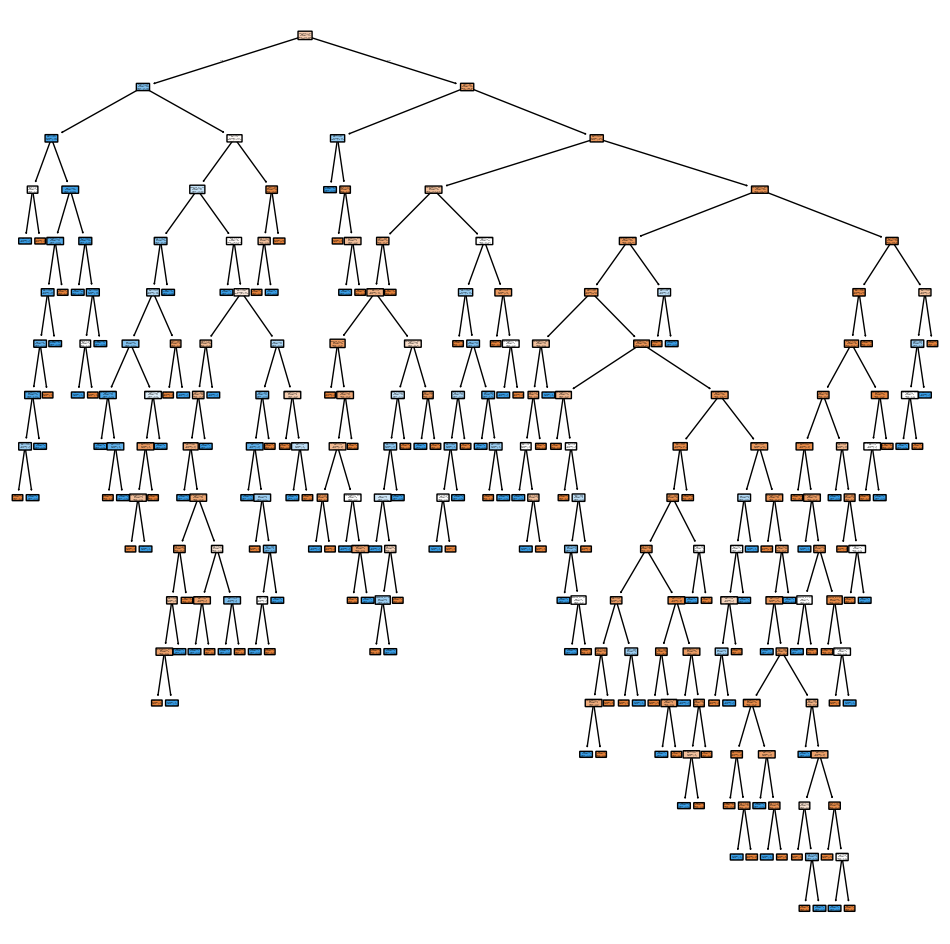

In [49]:
plt.figure(figsize=(12 ,12))
plot_tree(decision_tree, filled=True, rounded=True,class_names= ['Died', 'Survived'], feature_names=X.columns )
plt.show()